# CASE STUDY - NETWORKING
## NETWORK INTRUSION DETECTION

##  1. Binomial Classification: Activity is normal or attack

In [1]:
# Importng Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

import warnings
warnings.filterwarnings("ignore")

C:\Users\Ayush\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [2]:
from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

### Importing Data Sets

In [3]:
train = pd.read_csv('Train.txt',sep=',',header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
test = pd.read_csv('Test.txt',sep=',',header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [6]:
len(columns)

43

In [7]:
train.columns = columns
test.columns = columns

In [8]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [13]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
train['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [15]:
test['attack'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
sqlattack             2
phf                   2
loadmodule            2
perl                  2
udpstorm              2
worm                  2
imap                  1
Name: attack, dtype: int64

In [16]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [17]:
train.describe(include=np.object)

,protocol_type,service,flag,attack
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


In [18]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [19]:
test.describe(include=np.object)

,protocol_type,service,flag,attack
count,22544,22544,22544,22544
unique,3,64,11,38
top,tcp,http,SF,normal
freq,18880,7853,14875,9711


# 1. Binomial Classification: Activity is normal or attack

In [20]:
train_b = train.copy()

## For Training Data Set

In [21]:
train_b['attack_class'] = np.where(train_b.attack=='normal',0,1)

In [22]:
train_b

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,0
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1


In [23]:
train_b.loc[:,['attack','attack_class']]

,attack,attack_class
0,normal,0
1,normal,0
2,neptune,1
3,normal,0
4,normal,0
...,...,...
125968,neptune,1
125969,normal,0
125970,normal,0
125971,neptune,1


In [24]:
train_b['attack_class'].value_counts()

0    67343
1    58630
Name: attack_class, dtype: int64

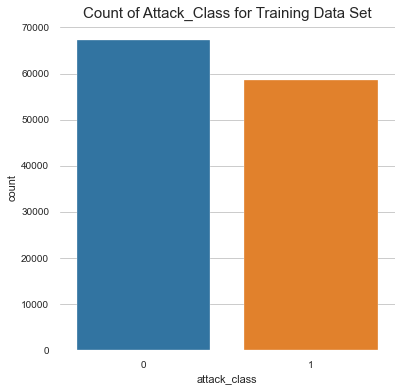

In [25]:
plt.figure(figsize=(6,6))
plt.title('Count of Attack_Class for Training Data Set',fontsize=15)
sns.countplot("attack_class", data=train_b)
plt.show()

In [26]:
# dropping attack variable as attack_class is imputed

train_b_cat = train_b.select_dtypes(np.object).drop('attack',axis=1)
train_b_cat

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
125968,tcp,private,S0
125969,udp,private,SF
125970,tcp,smtp,SF
125971,tcp,klogin,S0


In [27]:
# dropping attack variable as attack_class is imputed

train_b_num = train_b.drop(train_b_cat,axis=1).drop('attack',axis=1)
train_b_num

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0
2,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
3,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0
4,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20,1
125969,8,105,145,0,0,0,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18,0
125971,0,0,0,0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20,1


In [28]:
# Creating Data audit Report for numerical variable

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_b_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.144650,0.00,2.604515e+03,6.783500e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45566.743000,44.00,5.870331e+06,3.446079e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.114421,0.00,4.021269e+06,1.617061e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.000198,0.00,1.408607e-02,1.984174e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.022687,0.00,2.535300e-01,6.427745e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.000111,0.00,1.436603e-02,2.063827e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.204409,0.00,2.149968e+00,4.622364e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.001222,0.00,4.523914e-02,2.046580e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.0,4.985200e+04,0.395736,0.00,4.890101e-01,2.391308e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.279250,0.00,2.394204e+01,5.732214e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [29]:
# Create Data audit Report for categorical variables

def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])
cat_summary=train_b_cat.apply(lambda x: categorical_var_summary(x)).T
cat_summary

,N,NMISS,MODE,FREQ,PERCENT
protocol_type,125973,0,tcp,102689,81.52
service,125973,0,http,40338,32.02
flag,125973,0,SF,74945,59.49


### Creating Dummy Variables

In [30]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [31]:
#for c_feature in categorical_features
for c_feature in train_b_cat.columns:
    train_b_cat[c_feature] = train_b_cat[c_feature].astype('category')
    train_b_cat = create_dummies(train_b_cat , c_feature )

In [32]:
train_b_cat

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125971,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
train_b_cat.dtypes

protocol_type_tcp    uint8
protocol_type_udp    uint8
service_X11          uint8
service_Z39_50       uint8
service_aol          uint8
                     ...  
flag_S1              uint8
flag_S2              uint8
flag_S3              uint8
flag_SF              uint8
flag_SH              uint8
Length: 81, dtype: object

## Creating new data set with cleaned data

In [34]:
train_b_new = pd.concat([train_b_num,train_b_cat],axis=1)
train_b_new

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
for x in train_b_new.columns:
    print(x)

duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
last_flag
attack_class
protocol_type_tcp
protocol_type_udp
service_X11
service_Z39_50
service_aol
service_auth
service_bgp
service_courier
service_csnet_ns
service_ctf
service_daytime
service_discard
service_domain
service_domain_u
service_echo
service_eco_i
service_ecr_i
service_efs
service_exec
service_finger
service_ftp
service_ftp_data
service_gopher
service_harvest
service_hostnames
service_http
service_http_2784


In [36]:
### Correlation Matrix

# correlation matrix (ranges from 1 to -1)
corr = train_b_new.corr()
abs(corr['attack_class'].sort_values(ascending=False))

attack_class                1.000000
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
flag_S0                     0.650206
                              ...   
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
flag_SF                     0.756286
num_outbound_cmds                NaN
Name: attack_class, Length: 121, dtype: float64

### Feature importance from the Random Forest Model

In [37]:
#Splitting the data

feature_columns = train_b_new.columns.difference(['attack_class'])

feature_columns

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       ...
       'service_vmnet', 'service_whois', 'src_bytes', 'srv_count',
       'srv_diff_host_rate', 'srv_rerror_rate', 'srv_serror_rate',
       'su_attempted', 'urgent', 'wrong_fragment'],
      dtype='object', length=120)

In [38]:
from sklearn.model_selection import train_test_split


train_b_X, test_b_X, train_b_y, test_b_y = train_test_split(train_b_new[feature_columns],
                                                  train_b_new['attack_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 )
radm_clf.fit( train_b_X, train_b_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [41]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_b_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_b_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

   rank                      feature  importance
0     1                    dst_bytes    0.128333
1     2                    src_bytes    0.104765
2     3                    last_flag    0.062624
3     4                same_srv_rate    0.053100
4     5                      flag_SF    0.047357
5     6       dst_host_same_srv_rate    0.046679
6     7                diff_srv_rate    0.045791
7     8                    logged_in    0.045595
8     9                        count    0.040293
9    10                  serror_rate    0.040067
10   11     dst_host_srv_serror_rate    0.039835
11   12           dst_host_srv_count    0.037121
12   13              srv_serror_rate    0.026612
13   14       dst_host_diff_srv_rate    0.024343
14   15         dst_host_serror_rate    0.021881
15   16  dst_host_same_src_port_rate    0.021390
16   17               dst_host_count    0.018478
17   18  dst_host_srv_diff_host_rate    0.017334
18   19                      flag_S0    0.014949
19   20             

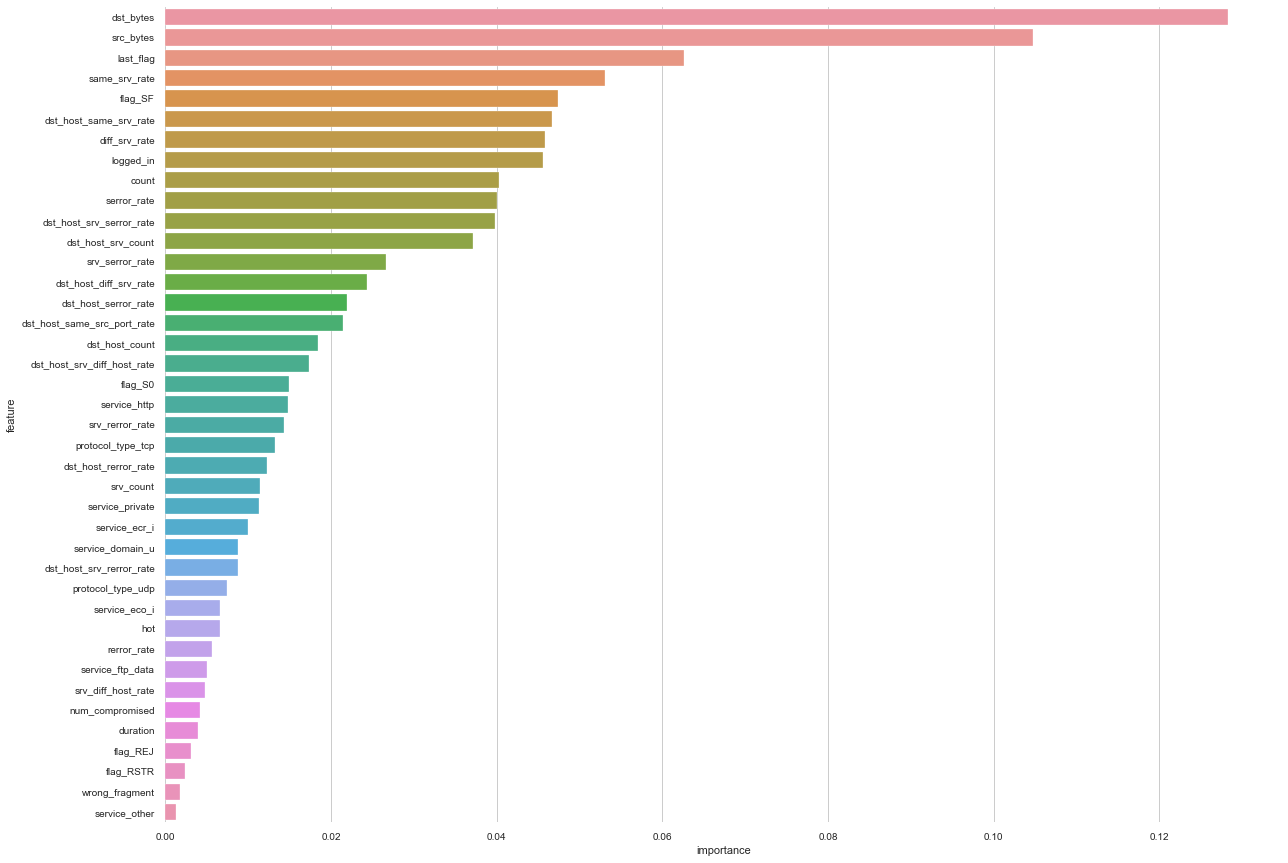

In [42]:
print(feature_rank.iloc[0:40])
plt.figure(figsize=(20,15))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank.iloc[0:40])
plt.show()

In [43]:
# Retaining 25 columns according to the importance

feature_rf = list(feature_rank.iloc[0:30]['feature'].values)
print(feature_rf)
print('\nNo. of features:',len(feature_rf))

['dst_bytes', 'src_bytes', 'last_flag', 'same_srv_rate', 'flag_SF', 'dst_host_same_srv_rate', 'diff_srv_rate', 'logged_in', 'count', 'serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_count', 'srv_serror_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_same_src_port_rate', 'dst_host_count', 'dst_host_srv_diff_host_rate', 'flag_S0', 'service_http', 'srv_rerror_rate', 'protocol_type_tcp', 'dst_host_rerror_rate', 'srv_count', 'service_private', 'service_ecr_i', 'service_domain_u', 'dst_host_srv_rerror_rate', 'protocol_type_udp', 'service_eco_i']

No. of features: 30


## Check Multicollinearity among independent variables. (VIF)

In [44]:
train_b_new[feature_rf]

,dst_bytes,src_bytes,last_flag,same_srv_rate,flag_SF,dst_host_same_srv_rate,diff_srv_rate,logged_in,count,serror_rate,...,srv_rerror_rate,protocol_type_tcp,dst_host_rerror_rate,srv_count,service_private,service_ecr_i,service_domain_u,dst_host_srv_rerror_rate,protocol_type_udp,service_eco_i
0,0,491,20,1.00,1,0.17,0.00,0,2,0.0,...,0.0,1,0.05,2,0,0,0,0.00,0,0
1,0,146,15,0.08,1,0.00,0.15,0,13,0.0,...,0.0,0,0.00,1,0,0,0,0.00,1,0
2,0,0,19,0.05,0,0.10,0.07,0,123,1.0,...,0.0,1,0.00,6,1,0,0,0.00,0,0
3,8153,232,21,1.00,1,1.00,0.00,1,5,0.2,...,0.0,1,0.00,5,0,0,0,0.01,0,0
4,420,199,21,1.00,1,1.00,0.00,1,30,0.0,...,0.0,1,0.00,32,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,20,0.14,0,0.10,0.06,0,184,1.0,...,0.0,1,0.00,25,1,0,0,0.00,0,0
125969,145,105,21,1.00,1,0.96,0.00,0,2,0.0,...,0.0,0,0.00,2,1,0,0,0.00,1,0
125970,384,2231,18,1.00,1,0.12,0.00,1,1,0.0,...,0.0,1,0.01,1,0,0,0,0.00,0,0
125971,0,0,20,0.06,0,0.03,0.05,0,144,1.0,...,0.0,1,0.00,8,0,0,0,0.00,0,0


In [45]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [46]:
#gather features from feature_rf
vif1 = pd.DataFrame()
def cal_vif(f,v):
    featuresn = train_b_new[f].columns
    featuresn = '+'.join(featuresn)
    featuresn = 'attack_class~'+featuresn
    y, X = dmatrices(featuresn, train_b_new, return_type='dataframe')
    v = pd.DataFrame()
    v['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    v['features'] = X.columns
    return v.sort_values('VIF Factor',ascending=False)

In [47]:
cal_vif(feature_rf,vif1)

,VIF Factor,features
0,631.242525,Intercept
13,132.480727,srv_serror_rate
10,97.310908,serror_rate
5,67.250262,flag_SF
11,64.895252,dst_host_srv_serror_rate
15,44.789370,dst_host_serror_rate
19,44.155987,flag_S0
21,42.981846,srv_rerror_rate
22,38.692157,protocol_type_tcp
29,25.422694,protocol_type_udp


In [48]:
# Function for dropping variables

def drop_var(x):
    var = x.sort_values('VIF Factor',ascending=False)[-(x.features=='Intercept')].head(1).features.values[0]
    return var

#### Removing variables one by one till all variables' vif ~ 10 or vif <10

In [49]:
# 1.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: srv_serror_rate


,VIF Factor,features
0,602.345352,Intercept
10,62.328416,serror_rate
5,59.212667,flag_SF
11,53.333565,dst_host_srv_serror_rate
14,43.744453,dst_host_serror_rate
18,43.609947,flag_S0
20,38.694478,srv_rerror_rate
21,38.692099,protocol_type_tcp
28,25.420350,protocol_type_udp
27,20.493568,dst_host_srv_rerror_rate


In [50]:
# 2.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: serror_rate


,VIF Factor,features
0,486.900992,Intercept
10,52.610736,dst_host_srv_serror_rate
17,43.538399,flag_S0
13,38.877317,dst_host_serror_rate
20,38.687356,protocol_type_tcp
5,36.420011,flag_SF
19,30.252398,srv_rerror_rate
27,25.420273,protocol_type_udp
26,20.493424,dst_host_srv_rerror_rate
6,13.295205,dst_host_same_srv_rate


In [51]:
# 3.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: dst_host_srv_serror_rate


,VIF Factor,features
0,477.156933,Intercept
16,40.365403,flag_S0
19,38.654123,protocol_type_tcp
5,34.150898,flag_SF
18,29.504211,srv_rerror_rate
12,26.002152,dst_host_serror_rate
26,25.409340,protocol_type_udp
25,20.319462,dst_host_srv_rerror_rate
6,13.289846,dst_host_same_srv_rate
8,11.896257,logged_in


In [52]:
# 4.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: flag_S0


,VIF Factor,features
0,433.783616,Intercept
18,38.283995,protocol_type_tcp
25,25.383967,protocol_type_udp
17,24.377561,srv_rerror_rate
5,23.458452,flag_SF
12,20.594865,dst_host_serror_rate
24,20.194517,dst_host_srv_rerror_rate
6,13.232534,dst_host_same_srv_rate
8,11.324773,logged_in
4,11.157738,same_srv_rate


In [53]:
# 5.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: protocol_type_tcp


,VIF Factor,features
0,238.385459,Intercept
17,24.350144,srv_rerror_rate
5,22.901805,flag_SF
12,20.197290,dst_host_serror_rate
23,20.158776,dst_host_srv_rerror_rate
6,13.221806,dst_host_same_srv_rate
4,11.092693,same_srv_rate
8,9.926804,logged_in
10,9.538578,dst_host_srv_count
18,8.775228,dst_host_rerror_rate


In [54]:
# 6.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: srv_rerror_rate


,VIF Factor,features
0,219.147332,Intercept
5,18.407534,flag_SF
12,16.503025,dst_host_serror_rate
6,13.220700,dst_host_same_srv_rate
22,11.420403,dst_host_srv_rerror_rate
4,11.009070,same_srv_rate
8,9.895188,logged_in
10,9.538521,dst_host_srv_count
17,8.554729,dst_host_rerror_rate
23,6.970082,protocol_type_udp


In [55]:
# 7.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: flag_SF


,VIF Factor,features
0,195.083544,Intercept
5,13.202413,dst_host_same_srv_rate
4,10.883101,same_srv_rate
11,9.815125,dst_host_serror_rate
9,9.523618,dst_host_srv_count
21,8.996040,dst_host_srv_rerror_rate
16,8.445761,dst_host_rerror_rate
7,8.085183,logged_in
22,6.089695,protocol_type_udp
8,5.006372,count


In [56]:
# 8.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: dst_host_same_srv_rate


,VIF Factor,features
0,190.921395,Intercept
4,10.432921,same_srv_rate
10,9.815016,dst_host_serror_rate
20,8.993074,dst_host_srv_rerror_rate
15,8.433057,dst_host_rerror_rate
6,7.959308,logged_in
21,6.056222,protocol_type_udp
8,5.850111,dst_host_srv_count
7,4.897465,count
16,4.814675,srv_count


In [57]:
# 9.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: same_srv_rate


,VIF Factor,features
0,132.410009,Intercept
19,8.992204,dst_host_srv_rerror_rate
9,8.059446,dst_host_serror_rate
14,8.002947,dst_host_rerror_rate
5,7.934272,logged_in
20,5.973612,protocol_type_udp
7,5.624043,dst_host_srv_count
13,4.217279,service_http
15,4.199881,srv_count
18,3.906633,service_domain_u


#### Now all variables vif < 10. So we consider these variables for further calculations

In [58]:
vif.shape

(22, 2)

In [61]:
vif_features = vif[-(vif['features']=='Intercept')].features.values
print('No. of features:',len(vif_features))
vif_features

No. of features: 21


array(['dst_host_srv_rerror_rate', 'dst_host_serror_rate',
       'dst_host_rerror_rate', 'logged_in', 'protocol_type_udp',
       'dst_host_srv_count', 'service_http', 'srv_count',
       'service_domain_u', 'count', 'service_eco_i', 'service_ecr_i',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_diff_srv_rate', 'dst_host_count', 'diff_srv_rate',
       'service_private', 'last_flag', 'src_bytes', 'dst_bytes'],
      dtype=object)

## Building a logistic regression model using statsmodel.api

### Model Build and Diagnostics
 - Train and Test split

In [60]:
train_b_new1 = pd.concat([train_b_new[vif_features],train_b_new['attack_class']],axis=1)
train_b_new1

,dst_host_srv_rerror_rate,dst_host_serror_rate,dst_host_rerror_rate,logged_in,protocol_type_udp,dst_host_srv_count,service_http,srv_count,service_domain_u,count,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_count,diff_srv_rate,service_private,last_flag,src_bytes,dst_bytes,attack_class
0,0.00,0.00,0.05,0,0,25,0,2,0,2,...,0.17,0.00,0.03,150,0.00,0,20,491,0,0
1,0.00,0.00,0.00,0,1,1,0,1,0,13,...,0.88,0.00,0.60,255,0.15,0,15,146,0,0
2,0.00,1.00,0.00,0,0,26,0,6,0,123,...,0.00,0.00,0.05,255,0.07,1,19,0,0,1
3,0.01,0.03,0.00,1,0,255,1,5,0,5,...,0.03,0.04,0.00,30,0.00,0,21,232,8153,0
4,0.00,0.00,0.00,1,0,255,1,32,0,30,...,0.00,0.00,0.00,255,0.00,0,21,199,420,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.00,1.00,0.00,0,0,25,0,25,0,184,...,0.00,0.00,0.06,255,0.06,1,20,0,0,1
125969,0.00,0.00,0.00,0,1,244,0,2,0,2,...,0.01,0.00,0.01,255,0.00,1,21,105,145,0
125970,0.00,0.72,0.01,1,0,30,0,1,0,1,...,0.00,0.00,0.06,255,0.00,0,18,2231,384,0
125971,0.00,1.00,0.00,0,0,8,0,8,0,144,...,0.00,0.00,0.05,255,0.05,0,20,0,0,1


In [62]:
train_features = train_b_new1.columns.difference(['attack_class'])
train_b_X, test_b_X = train_test_split(train_b_new1, test_size=0.2, random_state=123)
train_b_X

,dst_host_srv_rerror_rate,dst_host_serror_rate,dst_host_rerror_rate,logged_in,protocol_type_udp,dst_host_srv_count,service_http,srv_count,service_domain_u,count,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_count,diff_srv_rate,service_private,last_flag,src_bytes,dst_bytes,attack_class
111880,0.0,0.00,0.00,1,0,255,1,16,0,4,...,0.00,0.00,0.00,255,0.00,0,20,210,255,0
48663,0.0,0.00,0.00,0,1,254,0,268,1,268,...,0.00,0.00,0.01,255,0.00,0,18,44,79,0
52751,1.0,0.00,1.00,0,0,1,0,1,0,201,...,0.00,0.00,0.07,255,0.06,0,18,0,0,1
104967,0.0,1.00,0.00,0,0,20,0,20,0,149,...,0.00,0.00,0.07,255,0.06,0,20,0,0,1
22139,1.0,0.00,1.00,0,0,1,0,1,0,84,...,0.00,0.00,0.09,255,0.10,1,21,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61404,0.0,0.00,0.00,1,0,45,0,2,0,1,...,0.01,0.00,0.05,84,0.00,0,21,733,328,0
17730,0.0,1.00,0.00,0,0,4,0,4,0,199,...,0.00,0.00,0.06,255,0.06,0,18,0,0,1
28030,1.0,0.00,0.15,0,0,1,0,1,0,1,...,0.15,0.00,0.10,141,0.00,0,14,0,0,1
15725,0.0,0.00,0.00,1,0,255,1,11,0,11,...,0.04,0.01,0.00,27,0.00,0,21,222,267,0


In [64]:
print(len(train_b_X))
print(len(test_b_X))

100778
25195


In [65]:
import statsmodels.formula.api as sm

In [66]:
logreg = sm.logit(formula='attack_class ~ ' + "+".join(train_features), data=train_b_X)
result = logreg.fit()
summ = result.summary()
summ

Optimization terminated successfully.
         Current function value: 0.063772
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           attack_class   No. Observations:               100778
Model:                          Logit   Df Residuals:                   100756
Method:                           MLE   Df Model:                           21
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:                  0.9077
Time:                        21:52:14   Log-Likelihood:                -6426.8
converged:                       True   LL-Null:                       -69600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.0884      0.200     40.537      0.000       7.697       8.480
count                           0.0409      0.001     37.142      0.000       0.039       0.043
diff_srv_rate                   0.3647      0.132      2.774      0.006       0.107       0.623
dst_bytes                   -2.857e-09   5.45e-09     -0.524      0.600   -1.35e-08    7.82e-09
dst_host_count                  0.0081      0.000     20.635      0.000       0.007       0.009
dst_host_diff_srv_rate          0.5368      0.180      2.981      0.003       0.184       0.890
dst_host_rerror_rate            1.9324      0.154     12.538      0.000       1.630       2.235
dst_host_same_src_port_rate     2.5815      0.093     27.645      0.000       2.398       2.765
dst_host_serror_rate            4.5395      0.101     45.085      0.000       4.342       4.737
dst_host_srv_count             -0.0080      0.000    -21.177      0.000      -0.009      -0.007
dst_host_srv_diff_host_rate     3.7430      0.226     16.589      0.000       3.301       4.185
dst_host_srv_rerror_rate       -0.2197      0.158     -1.391      0.164      -0.529       0.090
last_flag                      -0.7161      0.011    -63.919      0.000      -0.738      -0.694
logged_in                      -1.5761      0.090    -17.487      0.000      -1.753      -1.399
protocol_type_udp              -2.2831      0.149    -15.364      0.000      -2.574      -1.992
service_domain_u               -3.5005      0.925     -3.786      0.000      -5.313      -1.688
service_eco_i                   3.6282      0.120     30.256      0.000       3.393       3.863
service_ecr_i                   3.5843      0.147     24.304      0.000       3.295       3.873
service_http                    2.4302      0.099     24.564      0.000       2.236       2.624
service_private                 5.2588      0.133     39.430      0.000       4.997       5.520
src_bytes                    6.757e-08   2.74e-08      2.470      0.013     1.4e-08    1.21e-07
srv_count                      -0.0326      0.001    -28.203      0.000      -0.035      -0.030
===============================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [67]:
# Extracting column having maximum P-value
def drop_var(mod):
    q = mod.pvalues.drop('Intercept')[mod.pvalues>0.05].sort_values(ascending=False).index[0]
    return q

In [68]:
drop_var(result)

'dst_bytes'

In [69]:
# Model 2
train_b_X_new = train_b_X.drop(drop_var(result), axis = 1)
train_features = train_features.difference([drop_var(result)])
logreg = sm.logit(formula='attack_class ~ ' + "+".join(train_features), data=train_b_X_new)
result2 = logreg.fit()
summ = result2.summary()
summ

Optimization terminated successfully.
         Current function value: 0.063772
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           attack_class   No. Observations:               100778
Model:                          Logit   Df Residuals:                   100757
Method:                           MLE   Df Model:                           20
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:                  0.9077
Time:                        21:53:18   Log-Likelihood:                -6426.9
converged:                       True   LL-Null:                       -69600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.0881      0.200     40.537      0.000       7.697       8.479
count                           0.0409      0.001     37.143      0.000       0.039       0.043
diff_srv_rate                   0.3648      0.132      2.774      0.006       0.107       0.623
dst_host_count                  0.0081      0.000     20.634      0.000       0.007       0.009
dst_host_diff_srv_rate          0.5366      0.180      2.980      0.003       0.184       0.890
dst_host_rerror_rate            1.9323      0.154     12.537      0.000       1.630       2.234
dst_host_same_src_port_rate     2.5814      0.093     27.644      0.000       2.398       2.764
dst_host_serror_rate            4.5395      0.101     45.085      0.000       4.342       4.737
dst_host_srv_count             -0.0080      0.000    -21.178      0.000      -0.009      -0.007
dst_host_srv_diff_host_rate     3.7430      0.226     16.590      0.000       3.301       4.185
dst_host_srv_rerror_rate       -0.2196      0.158     -1.391      0.164      -0.529       0.090
last_flag                      -0.7161      0.011    -63.919      0.000      -0.738      -0.694
logged_in                      -1.5760      0.090    -17.485      0.000      -1.753      -1.399
protocol_type_udp              -2.2830      0.149    -15.363      0.000      -2.574      -1.992
service_domain_u               -3.5004      0.924     -3.786      0.000      -5.312      -1.688
service_eco_i                   3.6283      0.120     30.257      0.000       3.393       3.863
service_ecr_i                   3.5844      0.147     24.305      0.000       3.295       3.873
service_http                    2.4302      0.099     24.564      0.000       2.236       2.624
service_private                 5.2588      0.133     39.431      0.000       4.997       5.520
src_bytes                    6.739e-08   2.74e-08      2.461      0.014    1.37e-08    1.21e-07
srv_count                      -0.0326      0.001    -28.204      0.000      -0.035      -0.030
===============================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [70]:
drop_var(result2)

'dst_host_srv_rerror_rate'

In [71]:
# Model 3
train_b_X_new = train_b_X_new.drop(drop_var(result2), axis = 1)
train_features = train_features.difference([drop_var(result2)])
logreg = sm.logit(formula='attack_class ~ ' + "+".join(train_features), data=train_b_X_new)
result3 = logreg.fit()
summ = result3.summary()
summ

Optimization terminated successfully.
         Current function value: 0.063782
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           attack_class   No. Observations:               100778
Model:                          Logit   Df Residuals:                   100758
Method:                           MLE   Df Model:                           19
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:                  0.9076
Time:                        21:53:53   Log-Likelihood:                -6427.8
converged:                       True   LL-Null:                       -69600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.0379      0.196     40.968      0.000       7.653       8.422
count                           0.0408      0.001     37.204      0.000       0.039       0.043
diff_srv_rate                   0.3485      0.132      2.649      0.008       0.091       0.606
dst_host_count                  0.0081      0.000     20.646      0.000       0.007       0.009
dst_host_diff_srv_rate          0.5072      0.178      2.851      0.004       0.159       0.856
dst_host_rerror_rate            1.7816      0.110     16.153      0.000       1.565       1.998
dst_host_same_src_port_rate     2.5784      0.093     27.616      0.000       2.395       2.761
dst_host_serror_rate            4.5797      0.097     47.219      0.000       4.390       4.770
dst_host_srv_count             -0.0080      0.000    -21.185      0.000      -0.009      -0.007
dst_host_srv_diff_host_rate     3.7388      0.226     16.559      0.000       3.296       4.181
last_flag                      -0.7154      0.011    -63.941      0.000      -0.737      -0.693
logged_in                      -1.5350      0.086    -17.951      0.000      -1.703      -1.367
protocol_type_udp              -2.2015      0.137    -16.058      0.000      -2.470      -1.933
service_domain_u               -3.4777      0.902     -3.856      0.000      -5.245      -1.710
service_eco_i                   3.6702      0.116     31.526      0.000       3.442       3.898
service_ecr_i                   3.6346      0.143     25.357      0.000       3.354       3.915
service_http                    2.4221      0.099     24.526      0.000       2.229       2.616
service_private                 5.2268      0.132     39.720      0.000       4.969       5.485
src_bytes                    6.764e-08   2.76e-08      2.454      0.014    1.36e-08    1.22e-07
srv_count                      -0.0325      0.001    -28.170      0.000      -0.035      -0.030
===============================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### All variables p-value<0.05. Hence result3 is our optimal model.

In [72]:
from sklearn import metrics

In [73]:
train_b_gini = 2*metrics.roc_auc_score(train_b_X_new['attack_class'], result3.predict(train_b_X_new)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_b_gini)

The Gini Index for the model built on the Train Data is :  0.9937001964149428


In [74]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result3.predict(train_b_X_new))
train_predicted_prob.columns = ['prob']
train_actual = train_b_X_new['attack_class']
# making a DataFrame with actual and prob columns
network_train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
network_train_predict.columns = ['actual','prob']
network_train_predict.head()

,actual,prob
111880,0,0.003252
48663,0,0.000257
52751,1,0.999268
104967,1,0.996650
22139,1,0.996135


In [75]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = network_train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    train_temp['tp'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

train_temp.sum()

actual       46811.0
prob         46811.0
predicted        4.0
tp               4.0
fp               0.0
tn           53967.0
fn           46807.0
dtype: float64

In [76]:
roc_like_df

,cutoff,sensitivity,specificity
0,0.000000,1.000000,0.000000
0,0.020408,0.999915,0.884800
0,0.040816,0.999445,0.916134
0,0.061224,0.998056,0.930087
0,0.081633,0.997159,0.936832
0,0.102041,0.995471,0.942205
0,0.122449,0.995172,0.947857
0,0.142857,0.994980,0.950896
0,0.163265,0.993762,0.953472
0,0.183673,0.993570,0.955473


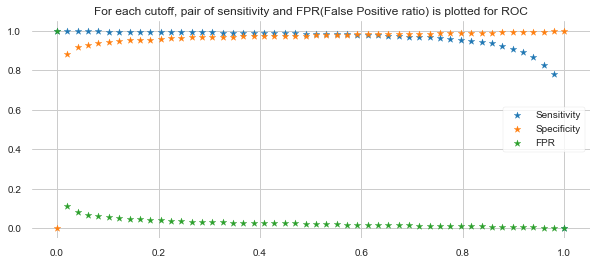

In [77]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR(False Positive ratio) is plotted for ROC')
plt.legend()

In [78]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.510204,0.985388,0.978227,1.963615


#### Model Validation

In [79]:
test_b_X_new = test_b_X[train_b_X_new.columns]
test_b_X_new

,dst_host_serror_rate,dst_host_rerror_rate,logged_in,protocol_type_udp,dst_host_srv_count,service_http,srv_count,service_domain_u,count,service_eco_i,service_ecr_i,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_count,diff_srv_rate,service_private,last_flag,src_bytes,attack_class
85247,0.00,0.0,1,0,255,1,13,0,13,0,0,0.08,0.05,0.00,13,0.00,0,21,243,0
121265,1.00,0.0,0,0,10,0,10,0,146,0,0,0.00,0.00,0.05,255,0.05,0,20,0,1
99209,0.00,0.0,0,0,255,0,36,0,36,0,1,1.00,0.00,0.00,255,0.00,0,18,520,1
8177,1.00,0.0,0,0,25,0,25,0,170,0,0,0.00,0.00,0.05,255,0.06,0,18,0,1
90461,0.00,1.0,0,0,255,1,2,0,1,0,0,0.02,0.14,0.00,46,0.00,0,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115302,1.00,0.0,0,0,16,0,18,0,110,0,0,0.00,0.00,0.06,255,0.06,1,21,0,1
11150,1.00,0.0,0,0,1,0,12,0,227,0,0,0.00,0.00,0.08,255,0.07,0,18,0,1
93904,1.00,0.0,0,0,12,0,12,0,266,0,0,0.00,0.00,0.07,255,0.06,0,20,0,1
116604,0.00,0.0,1,0,255,1,10,0,10,0,0,0.00,0.00,0.00,255,0.00,0,21,320,0


#### Model Validation 
    - Gini metric comparison

In [80]:
# Gini = 2 * AUC - 1
train_gini = 2*metrics.roc_auc_score(train_b_X_new['attack_class'], result3.predict(train_b_X_new)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)
test_gini = 2*metrics.roc_auc_score(test_b_X_new['attack_class'], result3.predict(test_b_X_new)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9937001964149428
The Gini Index for the model built on the Test Data is :  0.9936893918477709


#### Model Validation
    - Cut-Off based sensitivity comparison

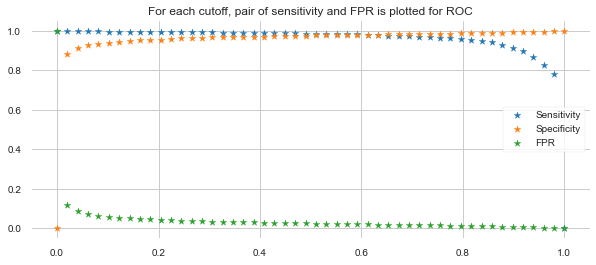

In [81]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result3.predict(test_b_X_new))
test_predicted_prob.columns = ['prob']
test_actual = test_b_X_new['attack_class']
# making a DataFrame with actual and prob columns
network_test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
network_test_predict.columns = ['actual','prob']
network_test_predict.head()

## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
test_roc_like_df = pd.DataFrame()
test_temp = network_test_predict.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)

test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [82]:
## Finding ideal cut-off for checking if this remains same in OOS validation
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['specificity']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.510204,0.985447,0.97645,1.961898


### If we compare this cutoff with train data set it gives us the same cutoff i.e 0.510204

#### Model Validation
    - Confusion Table metrics for the same cut-off

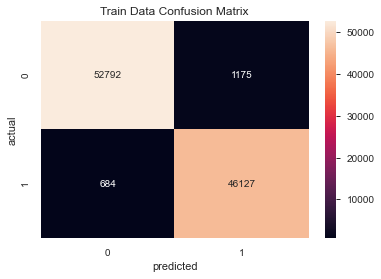

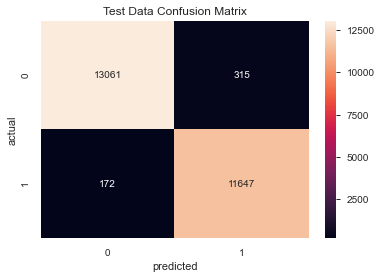

In [83]:
network_test_predict['predicted'] = network_test_predict['prob'].apply(lambda x: 1 if x > 0.510204 else 0)
network_train_predict['predicted'] = network_train_predict['prob'].apply(lambda x: 1 if x > 0.510204 else 0)
sns.heatmap(pd.crosstab(network_train_predict['actual'], network_train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(network_test_predict['actual'], network_test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [84]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(network_train_predict.actual, network_train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(network_test_predict.actual, network_test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9815535136636965
The overall accuracy score for the Test Data  is :  0.9806707680095257


In [85]:
auc_score_train = metrics.roc_auc_score(train_b_X_new['attack_class'], result3.predict(train_b_X_new))
print('auc score of train is',round(float( auc_score_train ), 5 ))

auc score of train is 0.99685


In [86]:
auc_score_test = metrics.roc_auc_score(test_b_X_new['attack_class'], result3.predict(test_b_X_new))
print('auc score of test is',round( float( auc_score_test ), 5 ))

auc score of test is 0.99684


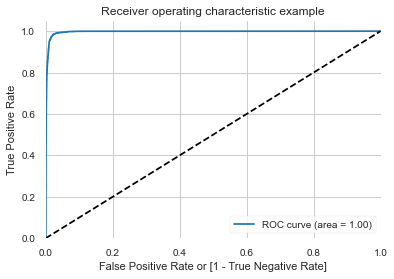

In [88]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( test_b_X_new['attack_class'],
                                     result3.predict(test_b_X_new),
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_test )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [89]:
print(metrics.classification_report(network_train_predict.actual, network_train_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     53967
           1       0.98      0.99      0.98     46811

   micro avg       0.98      0.98      0.98    100778
   macro avg       0.98      0.98      0.98    100778
weighted avg       0.98      0.98      0.98    100778



### Here, we have tested the data from the train data set given to us by splitting it into 80/20 
### Now we will test our Model for the test data given for the Case Study. 

**********************

## For Testing Data Set
#### Performing same steps for data preparation as done in train data set

In [90]:
test_b = test.copy()

In [91]:
test_b['attack_class'] = np.where(test_b.attack=='normal',0,1)

In [92]:
test_b.loc[:,['attack','attack_class']]

,attack,attack_class
0,neptune,1
1,neptune,1
2,normal,0
3,saint,1
4,mscan,1
...,...,...
22539,normal,0
22540,normal,0
22541,back,1
22542,normal,0


In [93]:
test_b['attack_class'].value_counts()

1    12833
0     9711
Name: attack_class, dtype: int64

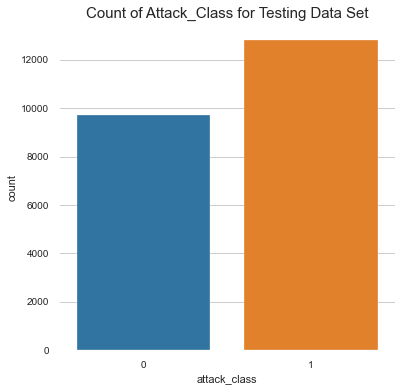

In [94]:
plt.figure(figsize=(6,6))
plt.title('Count of Attack_Class for Testing Data Set',fontsize=15)
sns.countplot("attack_class", data=test_b)
plt.show()

In [95]:
# dropping attack variable as attack_class is imputed

test_b_cat = test_b.select_dtypes(np.object).drop('attack',axis=1)
test_b_cat

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO
...,...,...,...
22539,tcp,smtp,SF
22540,tcp,http,SF
22541,tcp,http,SF
22542,udp,domain_u,SF


In [96]:
# dropping attack variable as attack_class is imputed

test_b_num = test_b.drop(test_b_cat,axis=1).drop('attack',axis=1)
test_b_num

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,0,0,0,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,1
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,1
2,2,12983,0,0,0,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21,0
3,0,20,0,0,0,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15,1
4,1,0,15,0,0,0,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,21,0
22540,0,317,938,0,0,0,0,0,1,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,21,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,15,1
22542,0,42,42,0,0,0,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,21,0


### Creating Dummy Variables

In [97]:
#for c_feature in categorical_features
for c_feature in test_b_cat.columns:
    test_b_cat[c_feature] = test_b_cat[c_feature].astype('category')
    test_b_cat = create_dummies(test_b_cat , c_feature )

In [98]:
test_b_cat

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22540,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22541,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22542,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Creating new data set with cleaned data

In [99]:
test_b_new = pd.concat([test_b_num,test_b_cat],axis=1)
test_b_new

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [100]:
for x in test_b_new.columns:
    print(x)

duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
last_flag
attack_class
protocol_type_tcp
protocol_type_udp
service_X11
service_Z39_50
service_auth
service_bgp
service_courier
service_csnet_ns
service_ctf
service_daytime
service_discard
service_domain
service_domain_u
service_echo
service_eco_i
service_ecr_i
service_efs
service_exec
service_finger
service_ftp
service_ftp_data
service_gopher
service_hostnames
service_http
service_http_443
service_imap4
service_iso_tsa

#### Model Validation

In [101]:
test_b_new = test_b_new[train_b_X_new.columns]
test_b_new

,dst_host_serror_rate,dst_host_rerror_rate,logged_in,protocol_type_udp,dst_host_srv_count,service_http,srv_count,service_domain_u,count,service_eco_i,service_ecr_i,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_count,diff_srv_rate,service_private,last_flag,src_bytes,attack_class
0,0.00,1.00,0,0,10,0,10,0,229,0,0,0.00,0.00,0.06,255,0.06,1,21,0,1
1,0.00,1.00,0,0,1,0,1,0,136,0,0,0.00,0.00,0.06,255,0.06,1,21,0,1
2,0.00,0.00,0,0,86,0,1,0,1,0,0,0.61,0.02,0.04,134,0.00,0,21,12983,0
3,0.00,0.00,0,0,57,0,65,0,1,1,0,1.00,0.28,0.00,3,0.00,0,15,20,1
4,0.00,0.83,0,0,86,0,8,0,1,0,0,0.03,0.02,0.17,29,0.00,0,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.01,0.00,1,0,141,0,1,0,1,0,0,0.01,0.01,0.06,100,0.00,0,21,794,0
22540,0.01,0.00,1,0,255,1,11,0,2,0,0,0.01,0.01,0.00,197,0.00,0,21,317,0
22541,0.00,0.07,1,0,255,1,10,0,5,0,0,0.00,0.00,0.00,255,0.00,0,15,54540,1
22542,0.00,0.00,0,1,252,0,6,1,4,0,0,0.00,0.00,0.01,255,0.00,0,21,42,0


#### Model Validation 
    - Gini metric comparison

In [102]:
# Gini = 2 * AUC - 1
train_gini = 2*metrics.roc_auc_score(train_b_X_new['attack_class'], result3.predict(train_b_X_new)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)
test_gini_new = 2*metrics.roc_auc_score(test_b_new['attack_class'], result3.predict(test_b_new)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini_new)

The Gini Index for the model built on the Train Data is :  0.9937001964149428
The Gini Index for the model built on the Test Data is :  0.8749227248643756


#### Model Validation
    - Cut-Off based sensitivity comparison

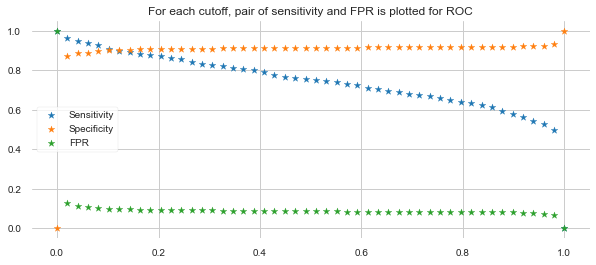

In [103]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result3.predict(test_b_new))
test_predicted_prob.columns = ['prob']
test_actual = test_b_new['attack_class']
# making a DataFrame with actual and prob columns
network_test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
network_test_predict.columns = ['actual','prob']
network_test_predict.head()

## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
test_roc_like_df = pd.DataFrame()
test_temp = network_test_predict.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)

test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [104]:
## Finding ideal cut-off for checking if this remains same in OOS validation
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['specificity']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.040816,0.950596,0.885182,1.835778


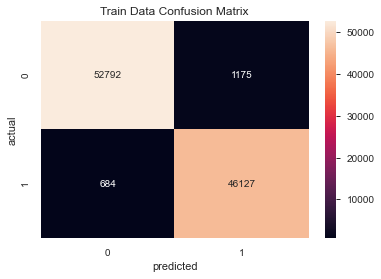

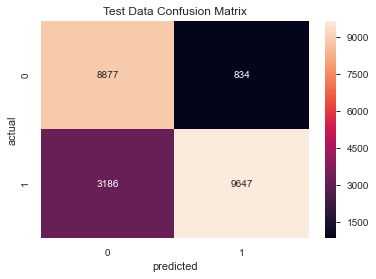

In [105]:
# Taking same cutoff as training data to predict values for test data

network_test_predict['predicted'] = network_test_predict['prob'].apply(lambda x: 1 if x > 0.510204 else 0)
network_train_predict['predicted'] = network_train_predict['prob'].apply(lambda x: 1 if x > 0.510204 else 0)
sns.heatmap(pd.crosstab(network_train_predict['actual'], network_train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(network_test_predict['actual'], network_test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [106]:
network_train_predict

,actual,prob,predicted
111880,0,0.003252,0
48663,0,0.000257,0
52751,1,0.999268,1
104967,1,0.996650,1
22139,1,0.996135,1
...,...,...,...
61404,0,0.000281,0
17730,1,0.999945,1
28030,1,0.467112,0
15725,0,0.000454,0


In [107]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(network_train_predict.actual, network_train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(network_test_predict.actual, network_test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9815535136636965
The overall accuracy score for the Test Data  is :  0.8216820440028388


In [108]:
auc_score_test_new = metrics.roc_auc_score(test_b_new['attack_class'], result3.predict(test_b_new))
print('auc score of test data is',round(float( auc_score_test_new), 5 ))

auc score of test data is 0.93746


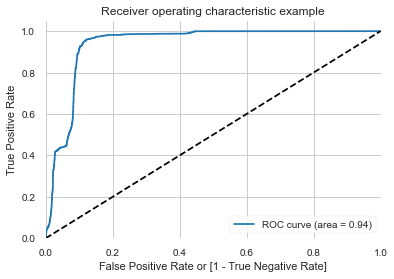

In [109]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( test_b_new['attack_class'],
                                     result3.predict(test_b_new),
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_test_new )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [110]:
print(metrics.classification_report(network_test_predict.actual, network_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82      9711
           1       0.92      0.75      0.83     12833

   micro avg       0.82      0.82      0.82     22544
   macro avg       0.83      0.83      0.82     22544
weighted avg       0.84      0.82      0.82     22544



******************************